# Исследование данных об успешности компьютерных игр

**Описание задачи**\
В данной работе представлены исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Для того чтобы была возможность сделать ставку на потенциально популярный продукт и спланировать рекламные кампании необходимо выявить закономерности, определяющие успешность игры. 

**План работы**
1. Предобработка данных

2. Анализ популярных платформ и жанров за актуальный период

3. Анализ зависимости объемов продаж от пользовательского рейтинга и оценки критиков

4. Составление портрета пользователя в зависимости от региона

5. Подготовка общего вывода

**Описание данных**
1. final_ab_events.csv - действия новых пользователей в период с 7 декабря 2020 по 4 января 2021 года. 
2. ab_project_marketing_events.csv - календарь маркетинговых событий на 2020 год
3. final_ab_new_users.csv - пользователи, зарегистрировавшиеся с 7 до 21 декабря 2020 года.
4. final_ab_participants.csv - таблица участников тестов

# Общий вывод

В данной работе были изучены исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) в период с 1980 по 2016 года.

В процессе предобработки данных были заменены удалены строки с пропусками в столбцах: 1) год выпуска 2) жанр 3) название. Строки с пропусками оценки пользователей, критиков, рейтинга ESRB были оставлены без изменений, так как эти данные значительно различаются от игры е игре. Из первоначального массива данных было удалено ~1.6 % от общего количества строк.

В процессе исследовательского анализа данных была изучена динамика выпуска новых игр. Отмечается, что пик продаж приходился на 2018-2019 года с последующим снижением. За последние 4 года среднее количество выпущенных игр составляет 500 млн.

Для планирования рекламной кампании на 2017 год, были изучены данные продаж за последние 6 лет (2012-2016). Было выявлено, что лидерами продаж являлись платформы PS3, X360, PS4, 3DS, XOne. Потенциально прибыльными платформами являются PS4, XOne и 3DS. Плаформой, стабильно выпускающей игры с большим объемом продаж, является Х360. Что касается жанров, наиболее прибыльными жанрами являются Action, Role-playing, Shooter, Sports. Самые низкие продажи отмечаются в жанре puzzle.

Было проведено исследование зависимости объемов продаж от пользовательского рейтинга и рейтинга критиков. Единая тенденция между зависимостью объёмов продаж от пользовательского рейтинга или оценки критиков не обнаружена. У некоторых платформ отмечается сильная положительная зависимость, у других отмечается сильная отрицательная зависимость.

Дополнительно, был проведён анализ распределения долей продаж по каждому рынку. Отмечается, что рынки Северной Америки и Европы примерно одинаковы. Основным отличием является лидер продаж. В Северной Америки это платформа X360, в Европе - PS4. В Японии самой популярной платформой является 3DS, выпускающая почти 50 % всех игр.

Также были изучены предпочтения пользователей из каждого региона. Пользователи из Северной Америки и Европы схожи. Наиболее распространённым жанром является Action. Что касается Японии, пользователи наиболее заинтересованы в играх жанра Role-Playing.

**Рекомендации:** \
Для следующей рекламной кампании рекомендуется обратить внимание на платформы PS4, XOne и 3DS, выпускающие игры жанра Action, Role-playing, Shooter, Sports

## Изучение общей информации 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import numpy as np

In [2]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
    
except:
    data = pd.read_csv('/my_folder_with_files/games.csv', sep='\t')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


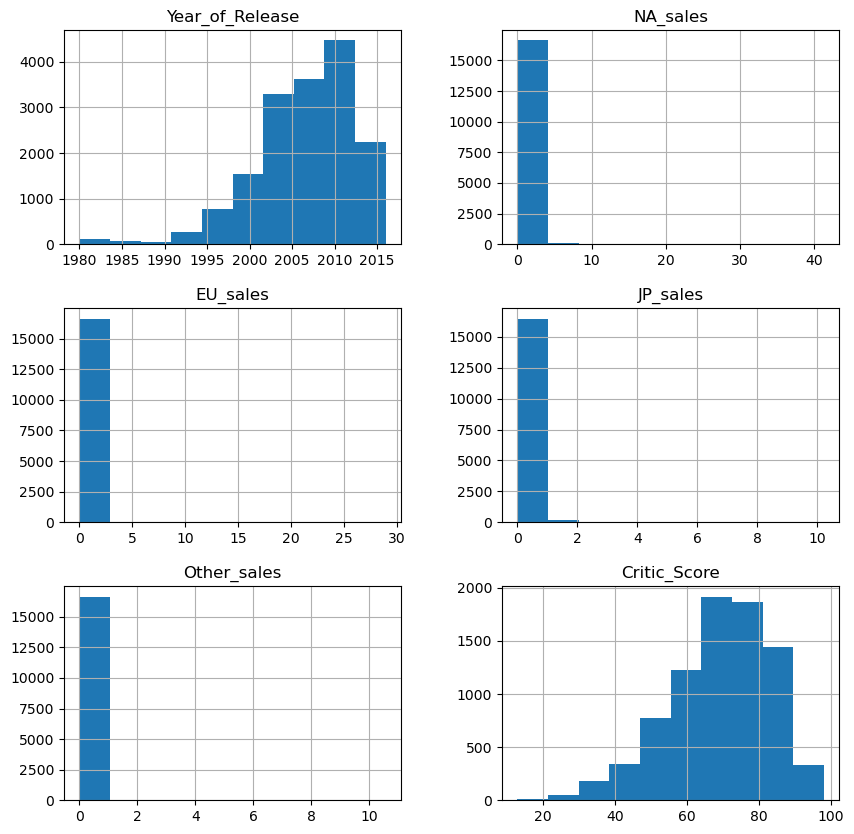

In [5]:
data.hist(figsize=(10,10));

Вывод: 
1. Пропуски в данных отмечаются в 6 столбцах из 11. Наибольшее количество пропусков отмечается в столбце Critic_Score
2. В столбцe Year_of_release указан неверный тип данных. Для дальнейшего анализа данные в столбце Year_of_release с float64 на int
3. Исходя из анализа гистограмм, можно сделать вывод, что в столбцах NA_sales, EU_sales, JP_sales, Other_sales встречаются аномальные значения. Скорее всего, это объясняется тем, что присутствует небольшое количество игр с огромным количеством проданных копий. Гистограмма по столбцам User_Score, Rating не была построена, так как тип данных в столбце object

## Предобработка данных

### Переименование столбцов

In [6]:
#приведение названий столбцов к нижнему регистру
data.columns = data.columns.str.lower()
data.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
418,Wii Music,Wii,2008.0,Misc,1.35,1.11,0.46,0.32,63.0,4.6,E


### Поиск пропущенных значений

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

### Устранение дубликатов

In [8]:
#поиск уникальных значений в столбце name
print(f"Количество уникальных значений в столбце name до обработки - {data['name'].nunique()}")

#вывод на экран уникальных значений в столбце name
data['name'].sort_values().unique()

Количество уникальных значений в столбце name до обработки - 11559


array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'wwe Smackdown vs. Raw 2006', '¡Shin Chan Flipa en colores!',
       nan], dtype=object)

Для удаления неявных дубликатов необходимо убрать проблемы перед названиями игр и поменять все буквы на прописные

In [9]:
#удаление пробелов перед названиями игр и замена всех букв на прописные
data['name'] = data['name'].str.lower().str.lstrip()

In [10]:
#вывод на экран уникальных значений в столбце name
print(f"Количество уникальных значений в столбце name после обработки - {data['name'].nunique()}")

Количество уникальных значений в столбце name после обработки - 11559


Вывод: количество уникальных значений в столбце name не поменялось. Оставляем названия без изменений.

In [11]:
#поиск уникальных значений в столбце platform
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [12]:
#поиск уникальных значений в столбце year_of_release
data['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [13]:
#поиск уникальных значений в столбце genre
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

In [14]:
#поиск уникальных значений в столбце rating
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Вывод: неявные дубликаты в столбцах platform, year_of_release, genre, rating не обнаружены

In [15]:
#поиск явных дубликатов
data.duplicated().sum()

0

Вывод: явные дубликаты в датафрейме не обнаружены

### Замена пропущенных значений

Пропущенные значение были обнаружены в 6 столбцах из 11. Ниже описан процесс обработки пропусков по каждому столбцу. \
name - название компьютерной игры не указано только в 2х строках. Данные строки могут быть удалены. \
year_of_release - количество строк с пропусками составляет 1.6 % от общего количества строк. Данные строки могут быть удалены без потери значительного количества данных \
genre - жанр игры пропущен в строках с пропущенными значениями в названии игры. Строки будут удалены. \
critic_score, user_score, rating - заполнение пропусков в данных столбцах нулевым, медианным или средним арифметическим значением невозможно, так как оценка может значительно отличаться от игры к игре. Пропуски необходимо оставить без изменений. \
Возможными причинами пропусков являются:
1. Ошибка при составлении таблицы и выгрузке данных.

2. Отсутствие результатов исследования отзывов по игре. Вполне вероятно, что по каким-то играм не был проведён опрос среди пользователей или критиков. 

In [16]:
#удаление пропущенных значений в столбце year_of_release и name
data = data.dropna(subset=['year_of_release','name'])

### Анализ данных со значениями tbd в столце user_score

In [17]:
#создание среза со значениями tbd в столбце user_score
data_sorted = data.loc[data['user_score'] == 'tbd']
data_sorted.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,namco museum: 50th anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,zumba fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,udraw studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,just dance kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E


In [18]:
#вывод уникальных значений year_of_release
data_sorted['year_of_release'].sort_values().unique()

array([1997., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.])

In [19]:
#вывод уникальных значений platform
data_sorted['platform'].sort_values().unique()

array(['3DS', 'DS', 'GBA', 'GC', 'PC', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'Wii', 'WiiU', 'X360', 'XB', 'XOne'], dtype=object)

In [20]:
#вывод уникальных значений rating
data_sorted['rating'].unique()

array(['E', 'E10+', 'T', nan, 'M', 'EC'], dtype=object)

In [21]:
data['user_score'].loc[(data['user_score'] == 'tbd') | (data['user_score'].isna())] = -1
data['user_score'] = pd.to_numeric(data['user_score'])

Вывод: общее количество строк со значением tbd в столбце user_score - 2376, что составляет ~14 % от общего массива данных. После проведения анализа не получилось обнаружить зависимость между оценкой пользователей tbd и остальными параметрами. Значения tbd встречаются вне зависимости от года выпуска игры, платформы, рейтинга. TBD (to be determined) означает, что оценка пользователей для игры не проведена. Значения tbd не могут быть заменены средним, медианным или нулевым значениями, так как оценка пользователей может значительно отличаться в зависимости от качества игры. Для дальнейшего анализа пропущенные значения и значения tbd в столбце user_score были заменены заглушкой -1.

### Изменение типа данных

In [22]:
#изменение типа данных с float на int
data['year_of_release'] = data['year_of_release'].astype('int')

### Обработка аномальных значений

In [23]:
data['na_sales'].sort_values()

16714     0.00
12497     0.00
12498     0.00
12502     0.00
12503     0.00
         ...  
2        15.68
5        23.20
9        26.93
1        29.08
0        41.36
Name: na_sales, Length: 16444, dtype: float64

In [24]:
data['eu_sales'].sort_values()

16714     0.00
12239     0.00
12242     0.00
5887      0.00
5886      0.00
         ...  
19        9.20
3        10.93
10       10.95
2        12.76
0        28.96
Name: eu_sales, Length: 16444, dtype: float64

In [25]:
data['jp_sales'].sort_values()

6347      0.00
14099     0.00
8295      0.00
8296      0.00
8297      0.00
         ...  
20        6.04
6         6.50
1         6.81
12        7.20
4        10.22
Name: jp_sales, Length: 16444, dtype: float64

In [26]:
data['other_sales'].sort_values()

16714     0.00
4737      0.00
12238     0.00
12239     0.00
12240     0.00
         ...  
2         3.29
16        3.96
48        7.53
0         8.45
17       10.57
Name: other_sales, Length: 16444, dtype: float64

Вывод: аномальных значений не обнаружено. Высокие продажи могут быть объяснены успешностью игры.
Нулевые продажи могут быть связаны с тем, что на определённом рынке игра не продавалась.
    

### Расчёт суммарных продаж во всех регионах

In [27]:
data['sales_total'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [28]:
data.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
4996,sd gundam g generation-f,PS,2000,Strategy,0.0,0.0,0.36,0.02,NaN,-1.0,NaN,0.38


## Исследовательский анализ данных

### Анализ количества выпущенных игр по каждому году

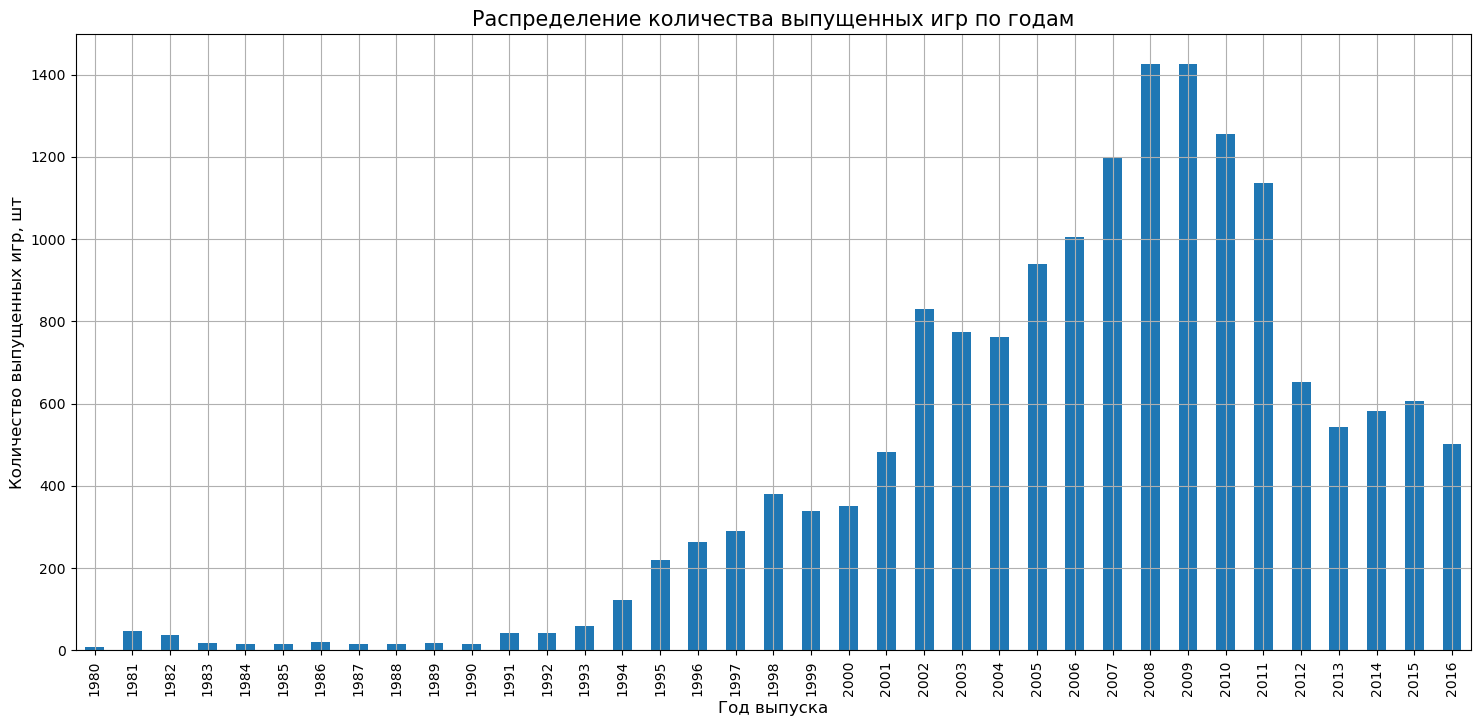

In [29]:
#создание сводной таблицы для расчёта количества выпущенных в каждом году
data_grouped_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
data_grouped_year.columns = ['Год выпуска', 'Количество выпущенных игр, млн']

#построение графика зависимости количества выпущенных игр от года
data_grouped_year.plot(x='Год выпуска', y='Количество выпущенных игр, млн', kind='bar', figsize=(18, 8), grid=True, legend=False)
plt.title('Распределение количества выпущенных игр по годам', fontsize=15)
plt.ylabel('Количество выпущенных игр, шт', fontsize=12)
plt.xlabel('Год выпуска', fontsize=12);

Вывод: начиная с 1992 года количество выпущенных игр увеличивалось каждый год до 2008 года. Наибольшее количество выпущенных игр приходится на 2008, 2009 года с последующим снижением в течение следующих 7 лет.

### Анализ частоты появления новых платформ и прекращения работы старых

In [30]:
#создание таблицы с расчётом общего количества проданных игр по каждой платформе
data_by_platform = data.pivot_table(index='platform', values='sales_total', aggfunc='sum').reset_index()
data_by_platform.sort_values('sales_total', ascending=False)

,platform,sales_total
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


Как видно из таблицы, среди всех платформ выделяются 6 с наибольшим количеством проданных игр (PS, PS2, PS3, X360, Wii, DS). Дальнейший анализ будет проведён для топ 6 платформ.

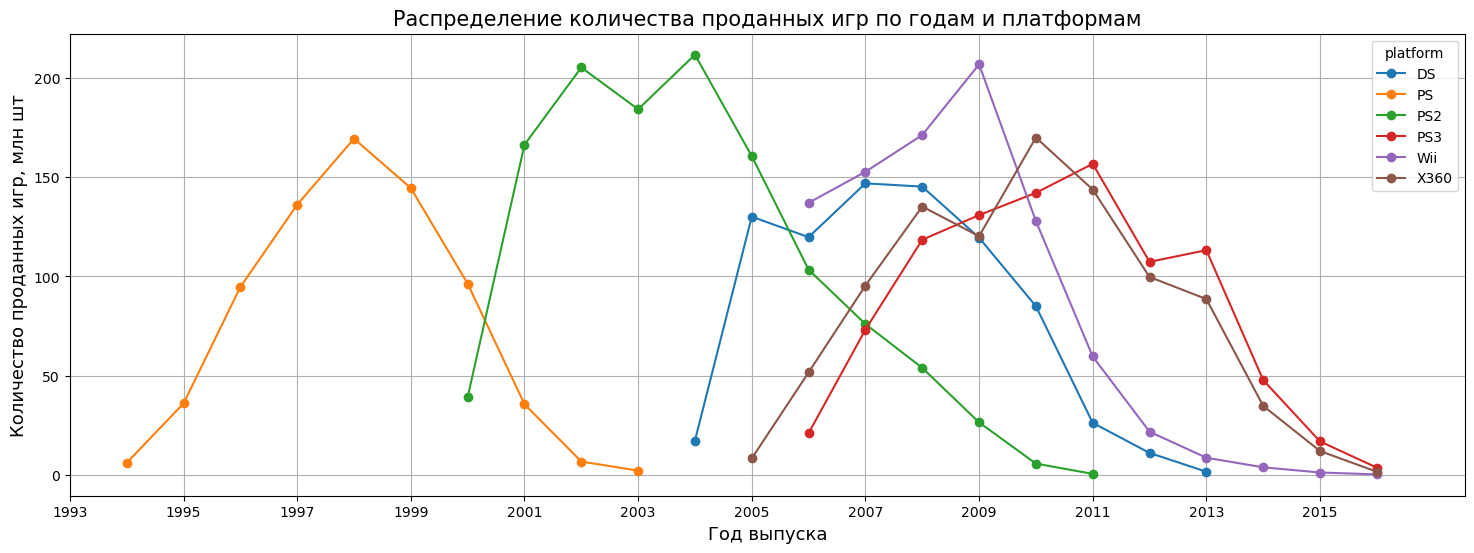

In [31]:
#создание новой переменной, включающей данные только по 6 платформам
data_top_platforms = data[(data['platform'] == 'PS2')|(data['platform'] == 'X360')|(data['platform'] == 'PS3')|\
                        (data['platform'] == 'Wii')|(data['platform'] == 'DS')|(data['platform'] == 'PS')]

#создание сводной таблицы для расчёта общего количества проданных игр по каждой платформе на протяжении нескольких лет
data_top_platforms = data_top_platforms.pivot_table(index='year_of_release', columns='platform', values='sales_total', aggfunc='sum').reset_index()

#построение графика зависимости количества проданных игр от года
data_top_platforms.plot(x='year_of_release', y=['DS','PS', 'PS2','PS3','Wii','X360'], grid=True, figsize=(18, 6), \
                       style='o-', xlim=1993)
plt.title('Распределение количества проданных игр по годам и платформам', fontsize=15)
plt.xlabel('Год выпуска', fontsize=13)
plt.xticks(np.arange(1993, 2017, 2))
plt.ylabel('Количество проданных игр, млн шт', fontsize=13);

Вывод: исходя из построенного графика, можно сделать вывод, что средняя продолжительность платформы составляет 11 лет. Почти у всех платформ пик продаж приходится на 5-6 года с момента создания с последующим падением. У компании playstation новая платформа появляется каждые 6 лет.

### Анализ продаж за актуальный период

За актуальный период, который позволит сделать прогноз на 2017 год, можно принять данные за период с 2012 по 2016 года. \
Обоснование:
начиная с 2012 года, количество выпущенных игр примерно одинаково, что может говорить о стабилизации рынка и нахождении оптимального сочетания спрос-предложение, в зависимости от предпочтений пользователей

In [32]:
#создание новой переменной, включающей данные за последние 6 лет
data_last_six_years = data.query('year_of_release > 2011')

#создание сводной таблицы с расчётом общего количества продаж по каждой платформе за последние 6 лет
data_last_six_years_pivot_sales = data_last_six_years.pivot_table(index='year_of_release', columns='platform', values='sales_total',\
                                                         aggfunc='sum').reset_index()
data_last_six_years_pivot_sales

platform,year_of_release,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
1,2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2,2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
3,2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
4,2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


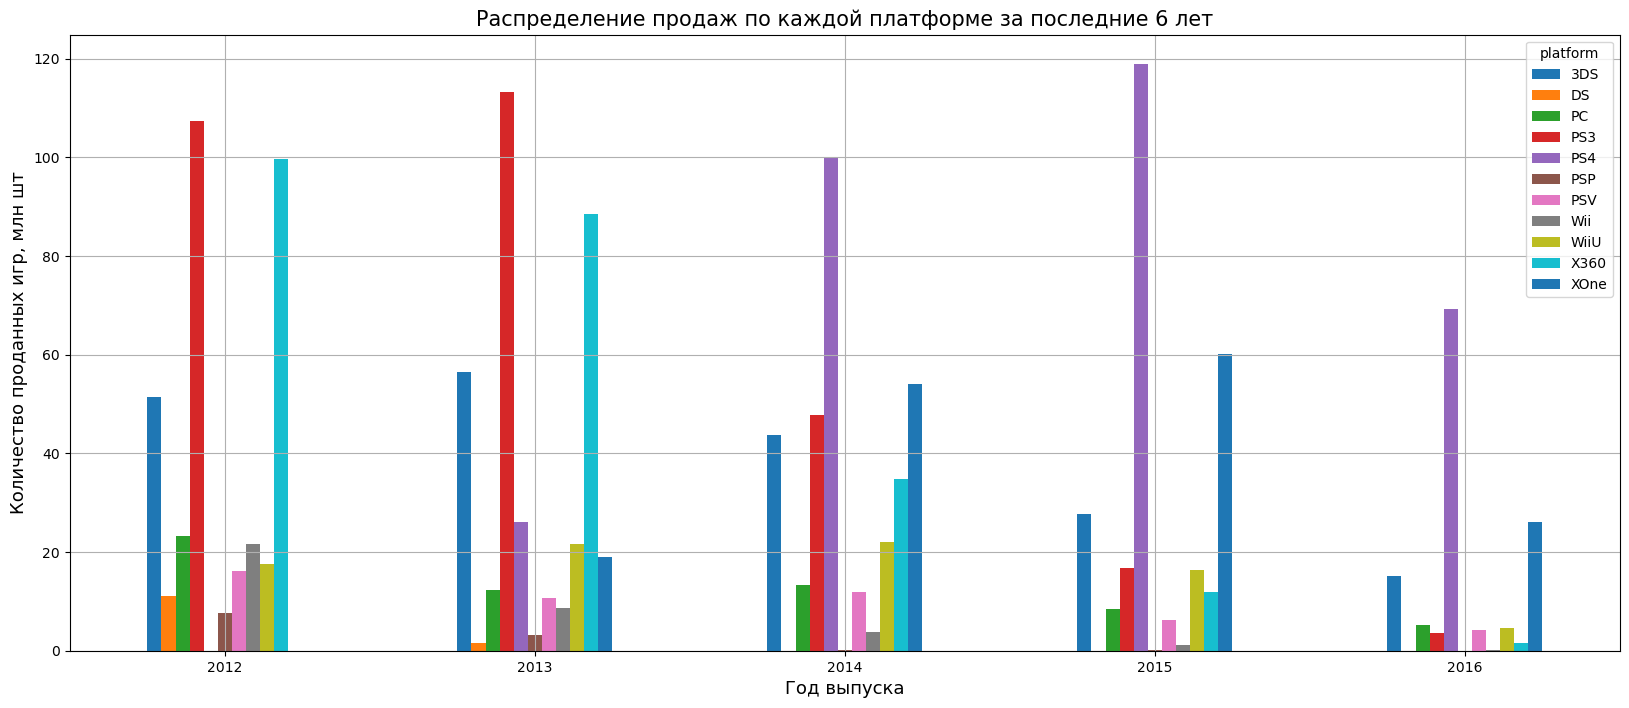

In [33]:
data_last_six_years_pivot_sales.plot(x='year_of_release', kind='bar',grid=True, figsize=(20, 8))
plt.xticks(rotation=0)
plt.title('Распределение продаж по каждой платформе за последние 6 лет', fontsize=15)
plt.xlabel('Год выпуска', fontsize=13)
plt.ylabel('Количество проданных игр, млн шт', fontsize=13);

Вывод: За последние 6 лет лидерами продаж являлись платформы PS3, X360, PS4, 3DS, XOne. Потенциально прибыльными платформами являются PS4, XOne и 3DS

### Анализ данных, используя график «ящик с усами»

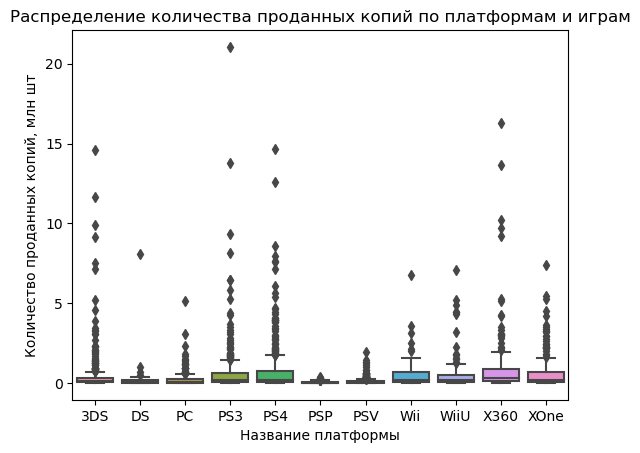

In [34]:
#построение графика по глобальным продажам игр в разбивке по платформам
data_last_six_years_grouped = data_last_six_years.groupby(['platform', 'name'])['sales_total'].sum().reset_index()
sns.boxplot(x=data_last_six_years_grouped['platform'], y=data_last_six_years_grouped['sales_total'])
plt.xlabel('Название платформы')
plt.ylabel('Количество проданных копий, млн шт')
plt.title('Распределение количества проданных копий по платформам и играм');

Вывод: наиболее прибыльная игра (игра с максимальным количество проданных игр) была выпущена на платформе PS3. Для более детального анализа необходимо произвести фильтрацию и убрать выбросы, превышающие 1.2 млн проданных игр

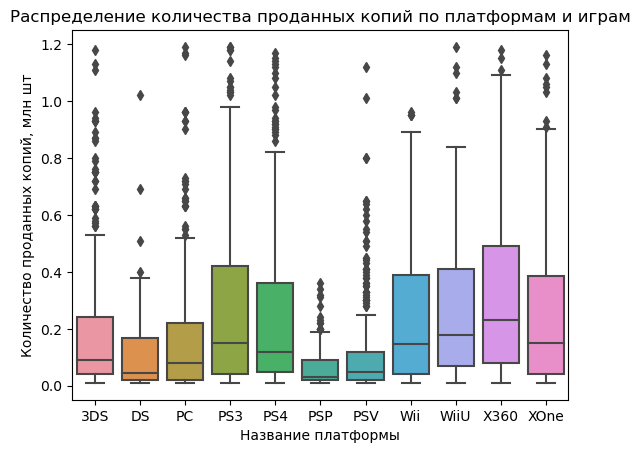

In [35]:
data_last_six_years_grouped_filtered = data_last_six_years_grouped.query('sales_total < 1.2')
sns.boxplot(x=data_last_six_years_grouped_filtered['platform'], y=data_last_six_years_grouped_filtered['sales_total'])
plt.xlabel('Название платформы')
plt.ylabel('Количество проданных копий, млн шт')
plt.title('Распределение количества проданных копий по платформам и играм');

Вывод: сравнивая значение медианы, можно выделить платформы, стабильно выпускающие игры с большим объёмом продаж. За последние 6 лидером является платформа X360.

### Анализ зависимости объёма продаж от отзывов пользователей и критиков


Для выполнения этого задания будут использованы данные по платформе PS4, так как за последние 3 года эта платформа лидировала по количеству продаж.

Коэффициент кореляции - -0.032


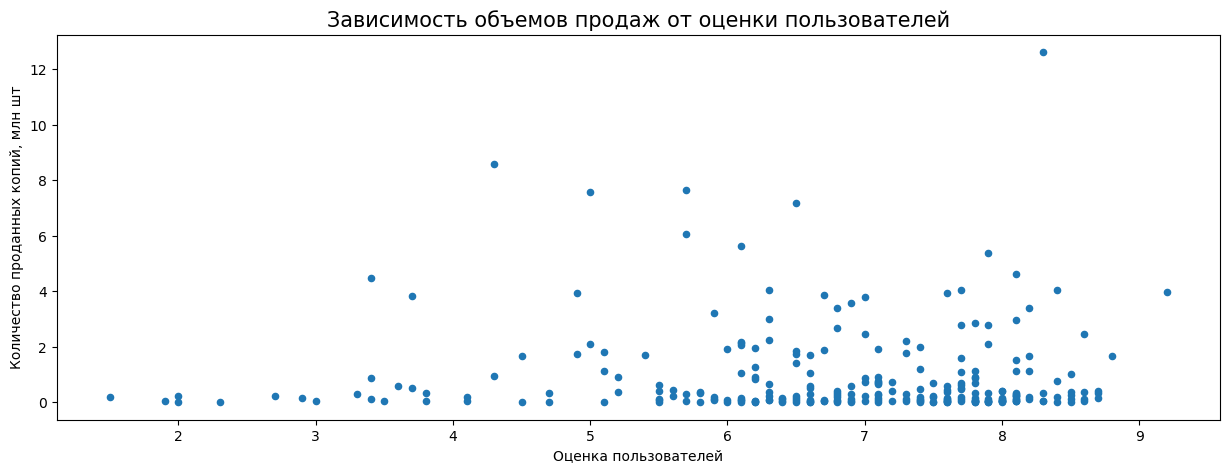

In [36]:
#создание среза данных по платформе PS4, построение графика зависимости продаж от оценки пользователей
data_PS4_user = data_last_six_years.query('platform == "PS4" & user_score >=0')
data_PS4_user.plot(x='user_score', y='sales_total', kind='scatter', figsize=(15, 5))
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество проданных копий, млн шт')
plt.title('Зависимость объемов продаж от оценки пользователей', fontsize=15);

#расчёт коэффициента корреляции
print(f"Коэффициент кореляции - {(data_PS4_user['sales_total'].corr(data_PS4_user['user_score'])).round(3)}")

Коэффициент кореляции - 0.116


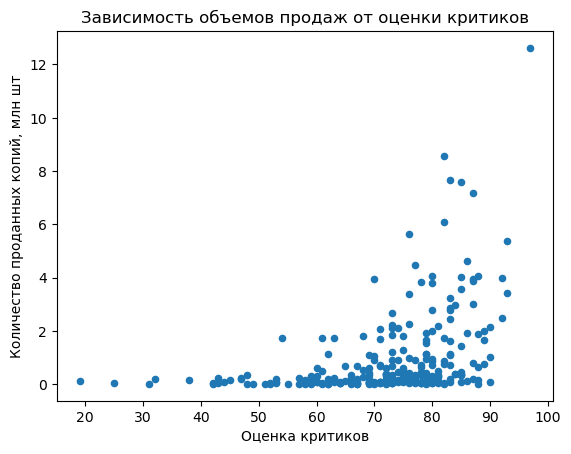

In [37]:
#создание среза данных по платформе PS4, построение графика зависимости продаж от оценки критиков
data_PS4_critic = data_last_six_years.query('platform == "PS4"')
data_PS4_critic.plot(x='critic_score', y='sales_total', kind='scatter')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество проданных копий, млн шт')
plt.title('Зависимость объемов продаж от оценки критиков');

#расчёт коэффициента корреляции
print(f"Коэффициент кореляции - {(data_PS4_critic['sales_total'].corr(data_PS4_critic['user_score'])).round(3)}")

Вывод: по платформе PS4 наблюдается не наблюдается зависимости объёма продаж от оценки пользователей или от оценки критиков.

### Соотнесите выводы с продажами игр на других платформах.

In [38]:
#расчёт коэффициента корреляции для всех платформ
platform_list_user = []
platform_corr_coef_user = [] 

for item in data_last_six_years['platform'].unique():
    data = data_last_six_years.loc[(data_last_six_years['platform'] == item) & (data_last_six_years['user_score'] >=0)]
    platform_list_user.append(item)
    platform_corr_coef_user.append((data['sales_total'].corr(data['user_score'])).round(3)) 

In [39]:
#создание таблицы, отображающей коэффициент корреляции для каждой платформы
table_user_score = pd.DataFrame(data=[platform_corr_coef_user] , columns=platform_list_user)
table_user_score

,PS3,X360,PS4,3DS,DS,XOne,WiiU,Wii,PC,PSV,PSP
0,-0.005,0.006,-0.032,0.198,0.883,-0.069,0.4,0.296,-0.122,-0.004,-0.802


In [40]:
#расчёт коэффициента корреляции для всех платформ
platform_list_critic = []
platform_corr_coef_critic = [] 

for item in data_last_six_years['platform'].unique():
    data = data_last_six_years.loc[(data_last_six_years['platform'] == item)]
    platform_list_critic.append(item)
    platform_corr_coef_critic.append((data['sales_total'].corr(data['critic_score'])).round(3)) 

/Users/dmitriisavrasov/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/dmitriisavrasov/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [41]:
#создание таблицы, отображающей коэффициент корреляции для каждой платформы
table_critic_score = pd.DataFrame(data=[platform_corr_coef_critic] , columns=platform_list_critic)
table_critic_score

,PS3,X360,PS4,3DS,DS,XOne,WiiU,Wii,PC,PSV,PSP
0,0.331,0.361,0.407,0.321,NaN,0.417,0.348,-0.424,0.237,0.094,NaN


In [42]:
#создание среза для дальнейшего построения графиков
data_PS3_user = data_last_six_years.query('platform == "PS3" & user_score >=0')
data_X360_user = data_last_six_years.query('platform == "X360" & user_score >=0')

data_PS3_critic = data_last_six_years.query('platform == "PS3"')
data_X360_critic = data_last_six_years.query('platform == "X360"')

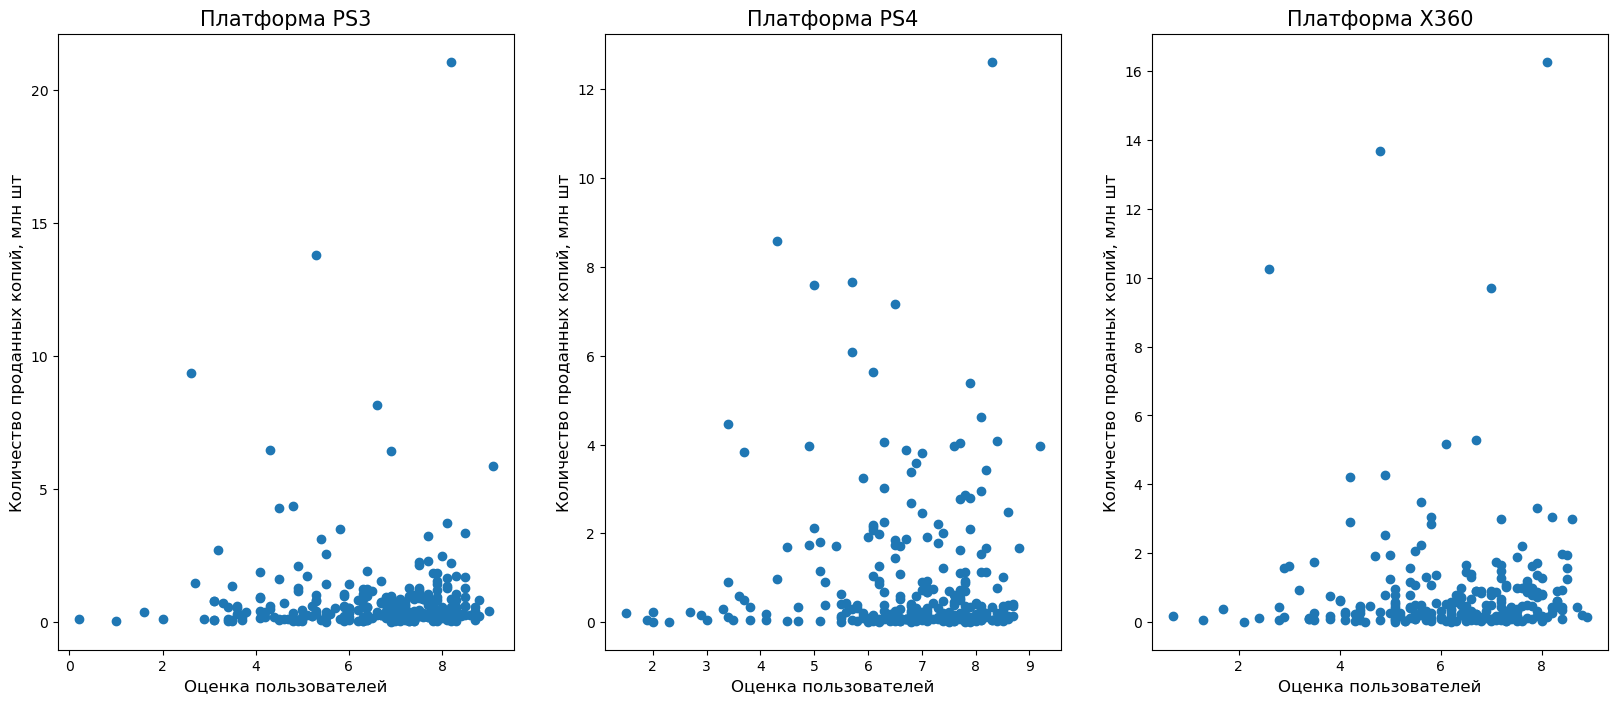

In [43]:
# Исходный набор данных
x_PS3 = data_PS3_user['user_score'] 
y_PS3 = data_PS3_user['sales_total']
x_PS4 = data_PS4_user['user_score'] 
y_PS4 = data_PS4_user['sales_total']
x_X360 = data_X360_user['user_score'] 
y_X360 = data_X360_user['sales_total']

# Настройка размеров подложки
plt.figure(figsize=(20, 8))

# Вывод графиков
plt.subplot(1, 3, 1)
plt.plot(x_PS3, y_PS3, 'o')
plt.title('Платформа PS3', fontsize=15)
plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Количество проданных копий, млн шт', fontsize=12)

plt.subplot(1, 3, 2)
plt.plot(x_PS4, y_PS4, 'o')
plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Количество проданных копий, млн шт', fontsize=12)
plt.title('Платформа PS4', fontsize=15)

plt.subplot(1, 3, 3);
plt.plot(x_X360, y_X360, 'o')
plt.title('Платформа X360', fontsize=15)
plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Количество проданных копий, млн шт', fontsize=12);


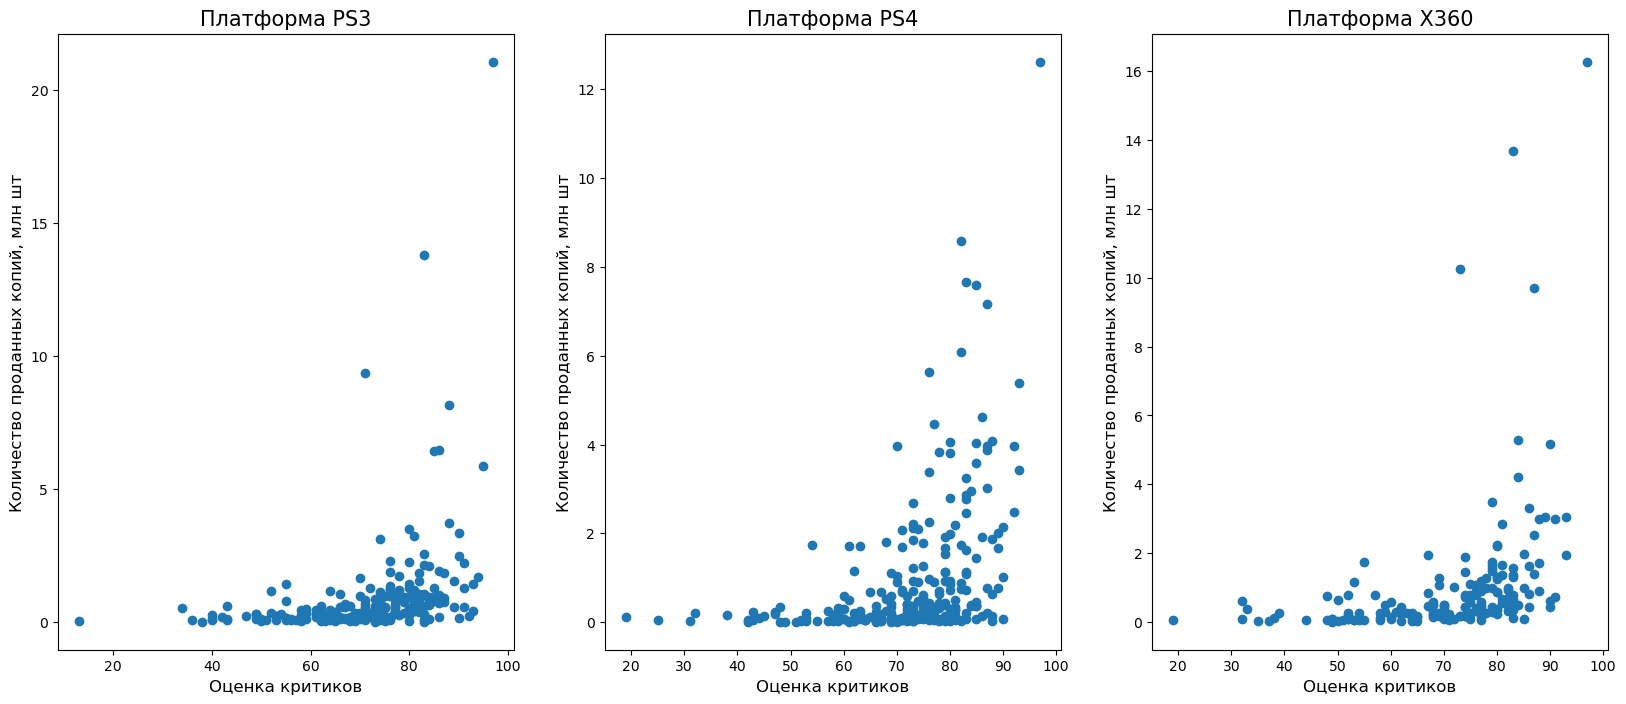

In [44]:
# Исходный набор данных
x_PS3 = data_PS3_critic['critic_score'] 
y_PS3 = data_PS3_critic['sales_total']
x_PS4 = data_PS4_critic['critic_score'] 
y_PS4 = data_PS4_critic['sales_total']
x_X360 = data_X360_critic['critic_score'] 
y_X360 = data_X360_critic['sales_total']

# Настройка размеров подложки
plt.figure(figsize=(20, 8))

# Вывод графиков
plt.subplot(1, 3, 1)
plt.plot(x_PS3, y_PS3, 'o')
plt.title('Платформа PS3', fontsize=15)
plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Количество проданных копий, млн шт', fontsize=12)

plt.subplot(1, 3, 2)
plt.plot(x_PS4, y_PS4, 'o')
plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Количество проданных копий, млн шт', fontsize=12)
plt.title('Платформа PS4', fontsize=15)

plt.subplot(1, 3, 3);
plt.plot(x_X360, y_X360, 'o')
plt.title('Платформа X360', fontsize=15)
plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Количество проданных копий, млн шт', fontsize=12);

Вывод: не наблюдается единая тенденция между зависимостью объёмов продаж от пользовательского рейтинга или оценки критиков. У каких-то платформ отмечается сильная положительная зависимость, у других отмечается сильная отрицательная зависимость.

### Анализ распределения игр по жанрам

In [45]:
#создание сводных таблиц с расчётом общего количества продаж, медианного и среднего значения по каждому жанру за последние 6 лет
data_last_six_years_pivot_genre = data_last_six_years.pivot_table(index='year_of_release', columns='genre', values='sales_total', \
                                                                 aggfunc={'sum', 'median', 'mean'}).reset_index().round(2)

pd.set_option('display.max_columns', None)
data_last_six_years_pivot_genre


year_of_release   mean                                                  \
genre                 Action Adventure Fighting  Misc Platform Puzzle Racing   
0                2012   0.45      0.10     0.32  0.60     1.67   0.16   0.45   
1                2013   0.83      0.10     0.35  0.60     0.68   0.32   0.77   
2                2014   0.52      0.07     0.69  0.56     0.88   0.21   0.62   
3                2015   0.28      0.15     0.38  0.30     0.47   0.12   0.45   
4                2016   0.17      0.07     0.28  0.08     0.22   0.01   0.12   

                                                      median            \
genre Role-Playing Shooter Simulation Sports Strategy Action Adventure   
0             0.60    1.49       0.74   0.56     0.22   0.17      0.04   
1             0.63    1.05       0.48   0.78     0.32   0.20      0.02   
2             0.51    1.39       0.51   0.84     0.12   0.20      0.04   
3             0.48    1.99       0.38   0.69     0.12   0.07      0.03   
4             0.34    0.81       0.11   0.49     0.09   0.05      0.02   

                                                                             \
genre Fighting  Misc Platform Puzzle Racing Role-Playing Shooter Simulation   
0         0.19  0.19     0.15   0.02   0.24         0.18    0.42       0.20   
1         0.15  0.18     0.38   0.10   0.34         0.18    0.34       0.10   
2         0.13  0.16     0.83   0.05   0.17         0.11    0.66       0.12   
3         0.10  0.19     0.10   0.04   0.15         0.11    0.92       0.20   
4         0.08  0.04     0.10   0.01   0.05         0.12    0.24       0.02   

                          sum                                            \
genre Sports Strategy  Action Adventure Fighting   Misc Platform Puzzle   
0       0.28     0.09  119.25      5.79     9.18  22.22    18.37   1.72   
1       0.37     0.19  122.51      6.09     7.09  25.27    24.54   0.96   
2       0.46     0.06   97.23      5.57    15.85  23.38     8.81   1.49   
3       0.12     0.04   72.02      8.16     7.90  11.57     6.05   0.71   
4       0.12     0.06   30.11      3.82     4.47   2.60     3.23   0.01   

                                                              
genre Racing Role-Playing Shooter Simulation Sports Strategy  
0      13.61        46.91   71.75      13.36  30.42     3.26  
1      12.37        44.45   62.04       8.63  41.17     6.12  
2      16.66        45.62   65.21       5.58  45.15     0.98  
3       8.07        37.64   67.51       5.66  40.84     1.85  
4       2.79        18.18   38.22       1.89  23.49     1.13

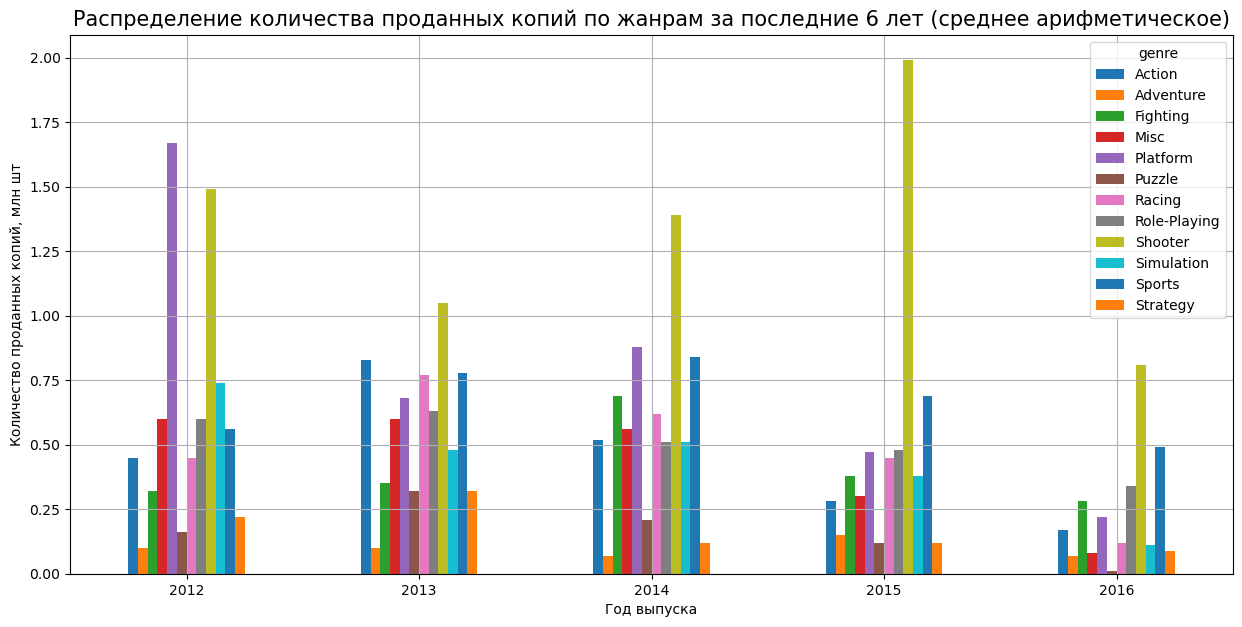

In [46]:
data_last_six_years_pivot_genre.plot(x='year_of_release', y='mean', kind='bar',grid=True, figsize=(15, 7))
plt.title('Распределение количества проданных копий по жанрам за последние 6 лет (среднее арифметическое)', fontsize=15)
plt.xlabel('Год выпуска')
plt.ylabel('Количество проданных копий, млн шт')
plt.xticks(rotation=0);

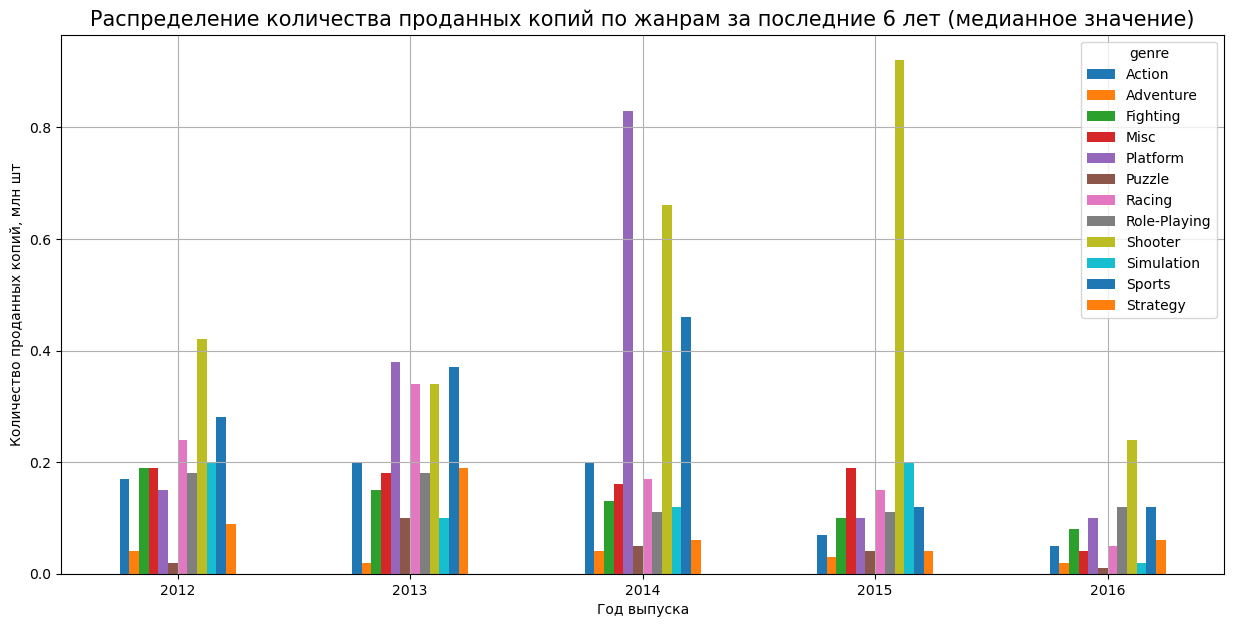

In [47]:
data_last_six_years_pivot_genre.plot(x='year_of_release', y='median', kind='bar',grid=True, figsize=(15, 7))
plt.title('Распределение количества проданных копий по жанрам за последние 6 лет (медианное значение)', fontsize=15)
plt.xlabel('Год выпуска')
plt.ylabel('Количество проданных копий, млн шт')
plt.xticks(rotation=0);

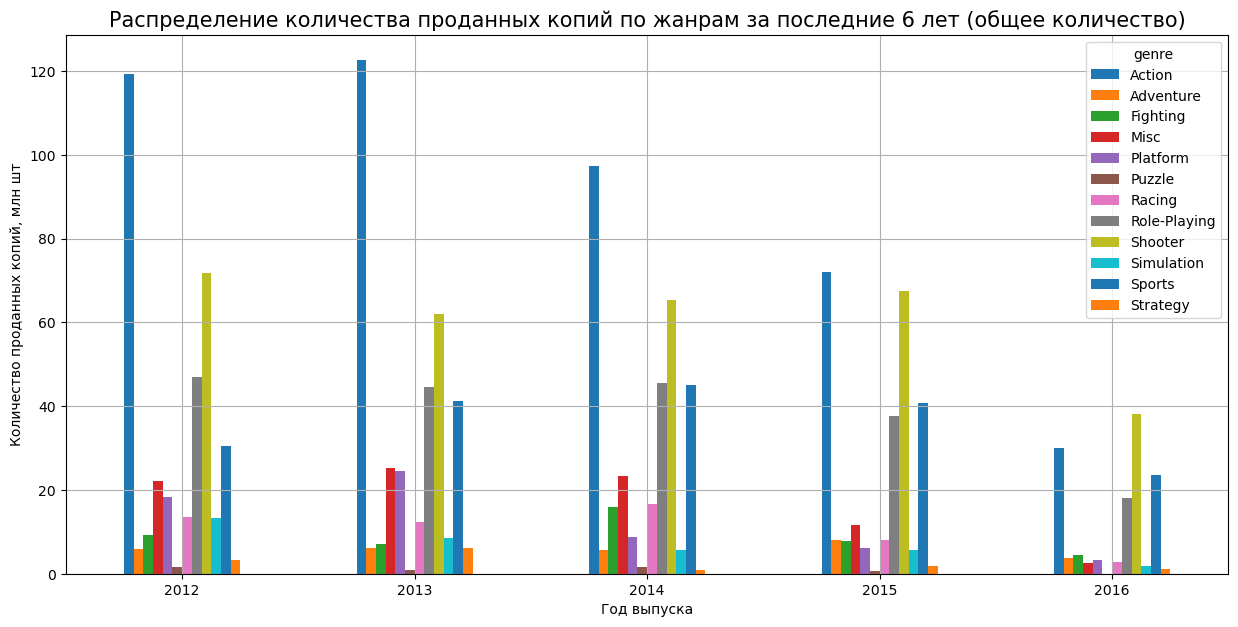

In [48]:
data_last_six_years_pivot_genre.plot(x='year_of_release', y='sum', kind='bar',grid=True, figsize=(15, 7))
plt.title('Распределение количества проданных копий по жанрам за последние 6 лет (общее количество)', fontsize=15)
plt.xlabel('Год выпуска')
plt.ylabel('Количество проданных копий, млн шт')
plt.xticks(rotation=0);

Вывод: за последние 6 лет наиболее высокий доход среднестатистической игры отмечается в жанре Shooter.

## Составление портрета пользователя в Северной Америке, Европе и Японии

### Анализ популярных платформ

In [49]:
#NA
data_NAsales = data_last_six_years.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
                .sort_values(by='na_sales', ascending=False)

data_NAsales_top5 = data_last_six_years.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
                .sort_values(by='na_sales', ascending=False).head()

data_NAsales_top5.loc['Other', 'na_sales'] = data_NAsales.iloc[5:].sum()[0]
data_NAsales_top5 = data_NAsales_top5.reset_index()

In [50]:
#EU
data_EUsales = data_last_six_years.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
                .sort_values(by='eu_sales', ascending=False)

data_EUsales_top5 = data_last_six_years.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
                .sort_values(by='eu_sales', ascending=False).head()

data_EUsales_top5.loc['Other', 'eu_sales'] = data_EUsales.iloc[5:].sum()[0]
data_EUsales_top5 = data_EUsales_top5.reset_index()

In [51]:
#JP
data_JPsales = data_last_six_years.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
                .sort_values(by='jp_sales', ascending=False)

data_JPsales_top5 = data_last_six_years.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
                .sort_values(by='jp_sales', ascending=False).head()

data_JPsales_top5.loc['Other', 'jp_sales'] = data_JPsales.iloc[5:].sum()[0]
data_JPsales_top5 = data_JPsales_top5.reset_index()

<Figure size 3000x3000 with 0 Axes>

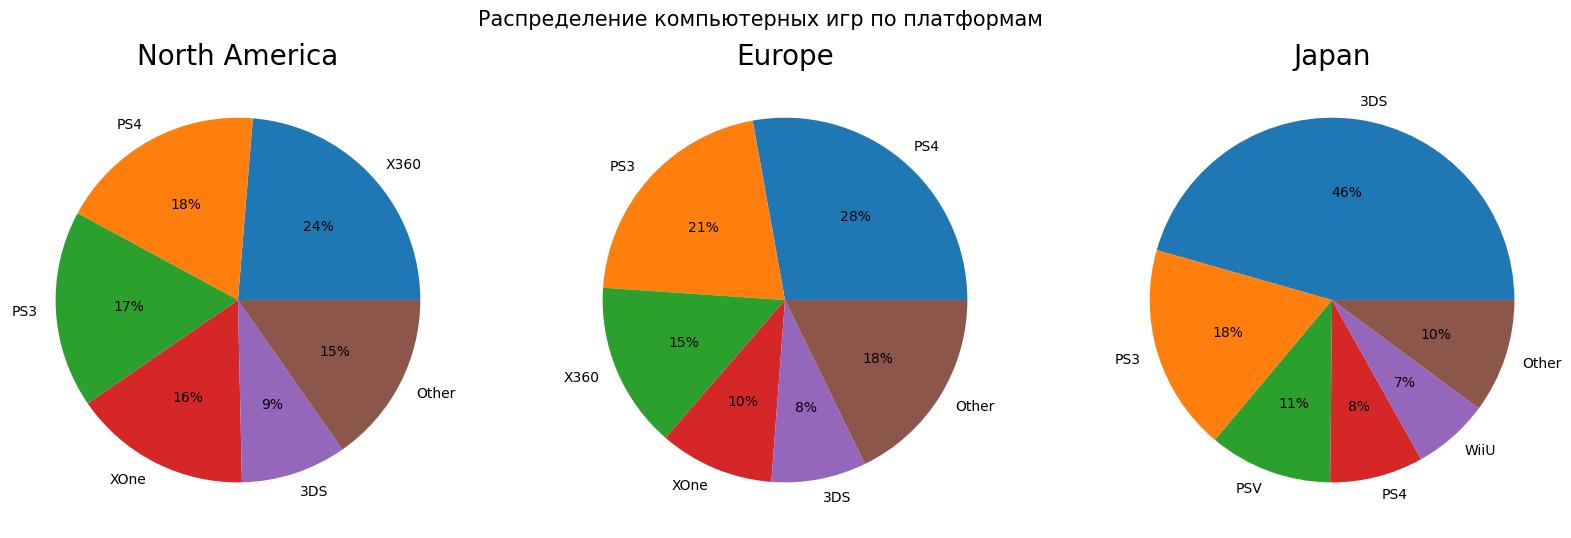

In [52]:
# Исходный набор данных
x_NA = data_NAsales_top5['na_sales']
x_EU = data_EUsales_top5['eu_sales']
x_JP = data_JPsales_top5['jp_sales']

# Настройка размеров подложки
plt.figure(figsize=(30, 30))

# Вывод графиков
fig, axs = plt.subplots(1, 3, figsize=(20, 6)); 
fig.suptitle('Распределение компьютерных игр по платформам', fontsize=15)
plt.subplot(1, 3, 1)
plt.pie(x_NA, labels=data_NAsales_top5['platform'], autopct='%.0f%%')
plt.title('North America', fontsize=20)

plt.subplot(1, 3, 2)
plt.pie(x_EU, labels=data_EUsales_top5['platform'], autopct='%.0f%%')
plt.title('Europe', fontsize=20)

plt.subplot(1, 3, 3)
plt.pie(x_JP, labels=data_JPsales_top5['platform'], autopct='%.0f%%')
plt.title('Japan', fontsize=20);

Вывод: Распределение долей продаж на рынках Северной Америки и Европы примерно одинаково. Основным отличием является лидер продаж. В Северной Америки это платформа X360, в Европе - PS4. В Японии самой популярной платформой является 3DS, выпускающая почти 50 % всех игр. Это может объясняться тем, что компания Nintendo, создавшая игровую платформу 3DS, базируется в Японии.

### Анализ популярных жанров

In [53]:
#NA
data_NAsales = data_last_six_years.pivot_table(index='genre', values='na_sales', aggfunc='sum')\
                .sort_values(by='na_sales', ascending=False)

data_NAsales_top5 = data_last_six_years.pivot_table(index='genre', values='na_sales', aggfunc='sum')\
                .sort_values(by='na_sales', ascending=False).head()

data_NAsales_top5.loc['Other', 'na_sales'] = data_NAsales.iloc[5:].sum()[0]
data_NAsales_top5 = data_NAsales_top5.reset_index()

In [54]:
#EU
data_EUsales = data_last_six_years.pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
                .sort_values(by='eu_sales', ascending=False)

data_EUsales_top5 = data_last_six_years.pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
                .sort_values(by='eu_sales', ascending=False).head()

data_EUsales_top5.loc['Other', 'eu_sales'] = data_EUsales.iloc[5:].sum()[0]
data_EUsales_top5 = data_EUsales_top5.reset_index()

In [55]:
#JP
data_JPsales = data_last_six_years.pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
                .sort_values(by='jp_sales', ascending=False)

data_JPsales_top5 = data_last_six_years.pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
                .sort_values(by='jp_sales', ascending=False).head()

data_JPsales_top5.loc['Other', 'jp_sales'] = data_JPsales.iloc[5:].sum()[0]
data_JPsales_top5 = data_JPsales_top5.reset_index()

<Figure size 3000x3000 with 0 Axes>

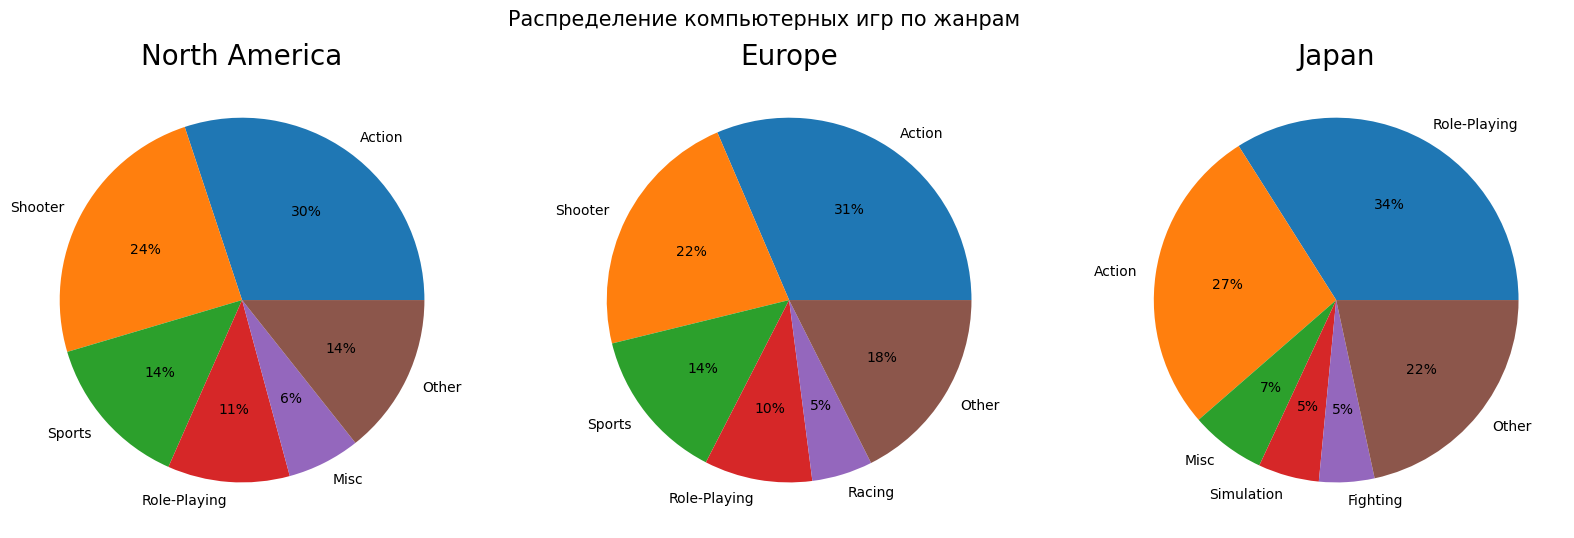

In [56]:
# Исходный набор данных
x_NA = data_NAsales_top5['na_sales']
x_EU = data_EUsales_top5['eu_sales']
x_JP = data_JPsales_top5['jp_sales']

# Настройка размеров подложки
plt.figure(figsize=(30, 30))

# Вывод графиков
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Распределение компьютерных игр по жанрам', fontsize=15)

plt.subplot(1, 3, 1)
plt.pie(x_NA, labels=data_NAsales_top5['genre'], autopct='%.0f%%')
plt.title('North America', fontsize=20)

plt.subplot(1, 3, 2)
plt.pie(x_EU, labels=data_EUsales_top5['genre'], autopct='%.0f%%')
plt.title('Europe', fontsize=20)

plt.subplot(1, 3, 3);
plt.pie(x_JP, labels=data_JPsales_top5['genre'], autopct='%.0f%%')
plt.title('Japan', fontsize=20);

Вывод: Предпочтения пользователя из Северной Америки схожи с пользователем из Европы. Наиболее распространённым жанром является Action. Что касается Японии, пользователи наиболее заинтересованы в играх жанра Role-Playing. Различие может быть связано с культурными особенностями.

### Анализ зависимости объема продаж от рейтинга игры

In [57]:
data_last_six_years['rating'].loc[data_last_six_years['rating'].isna()] = 'Not defined'

/var/folders/vw/k_40mwfd75d2pgfgg4n7td2r0000gn/T/ipykernel_90940/1877372853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_last_six_years['rating'].loc[data_last_six_years['rating'].isna()] = 'Not defined'


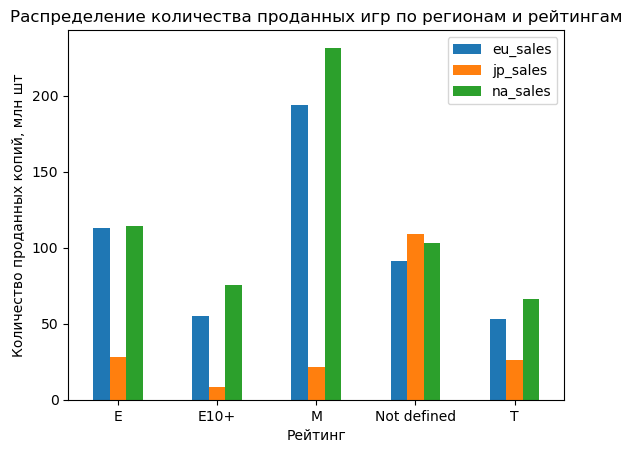

In [58]:
#замена пропущенных значений в столбце rating на Not defined
data_last_six_years['rating'].loc[data_last_six_years['rating'].isna()] = 'Not defined'

#создание сводной таблицы с расчётом общего количества продаж по каждому рейтингу в зависимости от региона
data_last_six_years_rating = data_last_six_years.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales']\
                                                             ,aggfunc='sum').reset_index()
data_last_six_years_rating.plot(x='rating', kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Рейтинг')
plt.ylabel('Количество проданных копий, млн шт')
plt.title('Распределение количества проданных игр по регионам и рейтингам');


Вывод: в Северной Америке и Европе наибольшее количество игр выпускается с рейтингом E и M. Отмечается, что в Японии максимальные объёмы продаж приходятся на игры без рейтинга. Возможной причиной может быть более строгое законодательство, которое более строго сделит за тем, чтобы игры продавались только тем людям, которые соответствуют рейтингу игры.

## Проверка гипотез

### Сравнение пользовательских рейтингов платформ Xbox One и PC

Для сравнения необходимо использовать двустороннюю гипотезу, так как нам необходимо определить только равенство. Поэтому нулевая и альтернативная гипотеза будут звучать таким образом: \
**Нулевая (H0)** = cредние пользовательские рейтинги платформ Xbox One и PC равны друг другу \
**Альтернативная (H1)** = cредние пользовательские рейтинги платформ Xbox One и PC не равны друг другу \
Перед проведением t-теста необходимо сравнить выборки для определения, использовать параметр equal_var или нет

In [59]:
#создание новой переменной, отображающей пользовательский рейтинг только по платформе XOne
array_XOne = data_last_six_years[['platform','user_score']].query('~user_score.isna() & user_score != "tbd" & platform == "XOne"')
array_XOne['user_score'] = array_XOne['user_score'].astype('float')
print(f"Количество строк - {array_XOne.shape[0]}")


Количество строк - 247


In [60]:
#создание новой переменной, отображающей пользовательский рейтинг только по платформе PC
array_PC = data_last_six_years[['platform','user_score']].query('~user_score.isna() & user_score != "tbd" & platform == "PC"')
array_PC['user_score'] = array_PC['user_score'].astype('float')
print(f"Количество строк - {array_PC.shape[0]}")


Количество строк - 250


Как видно, размеры выборок отличаются, поэтому будем считать, что дисперсии выборок не равны

In [61]:
#проведение t-теста

alpha = 0.05
results = st.ttest_ind(array_XOne['user_score'], array_PC['user_score'], equal_var = False)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


### Сравнение пользовательских жанров Action и Sports

Для сравнения необходимо использовать двустороннюю гипотезу, так как нам необходимо определить только равенство. Поэтому нулевая и альтернативная гипотеза будут звучать таким образом: \
**Нулевая (H0)** = cредние пользовательские рейтинги игр жанров Action и Sports не равны друг другу \
**Альтернативная (H1)** = cредние пользовательские рейтинги игр жанров Action и Sports равны друг другу \
Перед проведением t-теста необходимо сравнить выборки для определения, использовать параметр equal_var или нет 

In [62]:
#создание новой переменной, отображающей пользовательский рейтинг только по жанру Action
array_action = data_last_six_years[['genre','user_score']].query('~user_score.isna() & user_score != "tbd" & genre == "Action"')
array_action['user_score'] = array_action['user_score'].astype('float')
print(f"Количество строк - {array_action.shape[0]}")


Количество строк - 1031


In [63]:
#создание новой переменной, отображающей пользовательский рейтинг только по жанру Sports
array_sports = data_last_six_years[['genre','user_score']].query('~user_score.isna() & user_score != "tbd" & genre == "Sports"')
array_sports['user_score'] = array_sports['user_score'].astype('float')
print(f"Количество строк - {array_sports.shape[0]}")


Количество строк - 268


Как видно, размеры выборок отличаются, поэтому будем считать, что дисперсии выборок не равны

In [64]:
#проведение t-теста
alpha = 0.05
results = st.ttest_ind(array_action['user_score'], array_sports['user_score'], equal_var = False)
results.pvalue
if (1 - results.pvalue) < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


Вывод: после проведения t-теста не удалось отвергнуть, что:
1) cредние пользовательские рейтинги платформ Xbox One и PC равны друг другу 
2) cредние пользовательские рейтинги игр жанров Action и Sports не равны друг другу

# Общий вывод

В данной работе были изучены исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) в период с 1980 по 2016 года.

В процессе предобработки данных были заменены удалены строки с пропусками в столбцах: 1) год выпуска 2) жанр 3) название. Строки с пропусками оценки пользователей, критиков, рейтинга ESRB были оставлены без изменений, так как эти данные значительно различаются от игры е игре. Из первоначального массива данных было удалено ~1.6 % от общего количества строк.

В процессе исследовательского анализа данных была изучена динамика выпуска новых игр. Отмечается, что пик продаж приходился на 2018-2019 года с последующим снижением. За последние 4 года среднее количество выпущенных игр составляет 500 млн.

Для планирования рекламной кампании на 2017 год, были изучены данные продаж за последние 6 лет (2012-2016). Было выявлено, что лидерами продаж являлись платформы PS3, X360, PS4, 3DS, XOne. Потенциально прибыльными платформами являются PS4, XOne и 3DS. Плаформой, стабильно выпускающей игры с большим объемом продаж, является Х360. Что касается жанров, наиболее прибыльными жанрами являются Action, Role-playing, Shooter, Sports. Самые низкие продажи отмечаются в жанре puzzle.

Было проведено исследование зависимости объемов продаж от пользовательского рейтинга и рейтинга критиков. Единая тенденция между зависимостью объёмов продаж от пользовательского рейтинга или оценки критиков не обнаружена. У некоторых платформ отмечается сильная положительная зависимость, у других отмечается сильная отрицательная зависимость.

Дополнительно, был проведён анализ распределения долей продаж по каждому рынку. Отмечается, что рынки Северной Америки и Европы примерно одинаковы. Основным отличием является лидер продаж. В Северной Америки это платформа X360, в Европе - PS4. В Японии самой популярной платформой является 3DS, выпускающая почти 50 % всех игр.

Также были изучены предпочтения пользователей из каждого региона. Пользователи из Северной Америки и Европы схожи. Наиболее распространённым жанром является Action. Что касается Японии, пользователи наиболее заинтересованы в играх жанра Role-Playing.

**Рекомендации:** \
Для следующей рекламной кампании рекомендуется обратить внимание на платформы PS4, XOne и 3DS, выпускающие игры жанра Action, Role-playing, Shooter, Sports